In [1]:
import codecs
import glob
import logging
import os
import re
import scipy
import spacy
import logging
import sys
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
from time import time
from string import punctuation
from nltk.corpus import gutenberg, stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split,cross_val_score
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras import backend as K
%matplotlib inline

### Introduction ###

The purpose of this exercise is to classify authors using different novels that they have written. In this case, five different implementations of neural networks using Tensorflow and Keras have been used and tuned. Results are compared between them in terms of accuracy and complexity of each model.

Regarding the corpus the dataset has benn picked up randomly from the Gutenberg project and it is the same copus used in the unsupervides capstone project presented earlier. This project shares the initial cleasing stage with the capstone project. The authors that have been picked are:

1. Jane Austen
2. Chesterton
3. Conan Doyle
4. Charles Dickens
5. Elliot
6. Huxley
7. Shakespeare
8. Shaw
9. H.G. Wells
10. Oscar Wilde

In this notebook we will see the following steps:

1. Retreive and store the data creating the dataset
2. Cleanse and parse and tokenize texts
3. Multi Layer Perceptron
4. Simple LTSM
5. LTSM with Dropout
6. LTSM & Convolutional Neural Network
7. LTSM & Recurrent Neural Network
8. Conclusions

### 1. Retreive and store data creating the dataset ###

Seven novels from ten different authors have been retreived form Gutenberg project and a list of all the book files is created.

In [2]:
# Create a list of all of our book files.
book_filenames_austen = sorted(glob.glob("/home/borjaregueral/train/austen/*.txt"))
book_filenames_chesterton = sorted(glob.glob("/home/borjaregueral/train/chesterton/*.txt"))
book_filenames_conandoyle = sorted(glob.glob("/home/borjaregueral/train/conandoyle/*.txt"))
book_filenames_dickens = sorted(glob.glob("/home/borjaregueral/train/dickens/*.txt"))
book_filenames_elliot = sorted(glob.glob("/home/borjaregueral/train/elliot/*.txt"))
book_filenames_huxley = sorted(glob.glob("/home/borjaregueral/train/huxley/*.txt"))
book_filenames_shakespeare = sorted(glob.glob("/home/borjaregueral/train/shakespeare/*.txt"))
book_filenames_shaw = sorted(glob.glob("/home/borjaregueral/train/shaw/*.txt"))
book_filenames_wells = sorted(glob.glob("/home/borjaregueral/train/wells/*.txt"))
book_filenames_wilde = sorted(glob.glob("/home/borjaregueral/train/wilde/*.txt"))

The information is added to the copus and stored as raw books so that they can be cleansed

In [3]:
#Read and add the text of each book to corpus_raw.
corpus_raw_austen = u""
for book_filename in book_filenames_austen:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_austen += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_austen)))
    print()
    
#Read and add the text of each book to corpus_raw.
corpus_raw_chesterton = u""
for book_filename in book_filenames_chesterton:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_chesterton += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_chesterton)))
    print()
    
#Read and add the text of each book to corpus_raw.
corpus_raw_conandoyle = u""
for book_filename in book_filenames_conandoyle:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_conandoyle += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_conandoyle)))
    print()

#Read and add the text of each book to corpus_raw.
corpus_raw_dickens = u""
for book_filename in book_filenames_dickens:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_dickens += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_dickens)))
    print()

#Read and add the text of each book to corpus_raw.
corpus_raw_elliot = u""
for book_filename in book_filenames_elliot:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_elliot += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_elliot)))
    print()    
    
#Read and add the text of each book to corpus_raw.
corpus_raw_huxley = u""
for book_filename in book_filenames_huxley:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_huxley += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_huxley)))
    print()

#Read and add the text of each book to corpus_raw.
corpus_raw_shakespeare = u""
for book_filename in book_filenames_shakespeare:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_shakespeare += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_shakespeare)))
    print()
    
#Read and add the text of each book to corpus_raw.
corpus_raw_shaw = u""
for book_filename in book_filenames_shaw:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_shaw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_shaw)))
    print()
    
#Read and add the text of each book to corpus_raw.
corpus_raw_wells = u""
for book_filename in book_filenames_wells:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_wells += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_wells)))
    print()
    
#Read and add the text of each book to corpus_raw.
corpus_raw_wilde = u""
for book_filename in book_filenames_wilde:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw_wilde += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw_wilde)))
    print()
    
#Create a list with all the corpus   
doc_complete = [corpus_raw_austen, corpus_raw_chesterton,
                corpus_raw_conandoyle, corpus_raw_dickens,
                corpus_raw_elliot, corpus_raw_huxley,
                corpus_raw_shakespeare, corpus_raw_shaw,
               corpus_raw_wells, corpus_raw_wilde]

#Calculate the length of the corpus
len(corpus_raw_austen + corpus_raw_chesterton +
                corpus_raw_conandoyle + corpus_raw_dickens +
                corpus_raw_elliot + corpus_raw_huxley +
                corpus_raw_shakespeare + corpus_raw_shaw +
               corpus_raw_wells + corpus_raw_wilde)

#Close the book file 
book_file.close()

Reading '/home/borjaregueral/train/austen/austen-emma.txt'...
Corpus is now 795775 characters long

Reading '/home/borjaregueral/train/austen/austen-loveandfriendship.txt'...
Corpus is now 980773 characters long

Reading '/home/borjaregueral/train/austen/austen-mansfield.txt'...
Corpus is now 1549557 characters long

Reading '/home/borjaregueral/train/austen/austen-northanger.txt'...
Corpus is now 1990819 characters long

Reading '/home/borjaregueral/train/austen/austen-persuasion.txt'...
Corpus is now 2457111 characters long

Reading '/home/borjaregueral/train/austen/austen-pride_and_prejudice.txt'...
Corpus is now 3167694 characters long

Reading '/home/borjaregueral/train/chesterton/chesterton-allthingsconsidered.txt'...
Corpus is now 337803 characters long

Reading '/home/borjaregueral/train/chesterton/chesterton-ballad.txt'...
Corpus is now 452044 characters long

Reading '/home/borjaregueral/train/chesterton/chesterton-brown.txt'...
Corpus is now 858673 characters long

Reading '

### 2. Cleanse and parse and tokenize text###

Before generating the features, and to increase the explanatory power of them, text has been cleaned and parsed accordingly.  The books have gone through an initial set of cleansing actions before been parsed using Spacy, to reduce the computing effort required by the latter and then have been cleaned again before the feature generation.

The initial cleansing action has had three steps. The first step consisted on deleting all references to the Gutenberg Project from every book. This way, it has been avoided that words like “Gutenberg” and “Gutenberg Project” appear as features and distort the clustering of the authors.

As described below, cleaning actions have gone from removing all references to chapters, digits double whitespaces and references to numbers like dates and ordinal numbers. This has been followed by removing punctuation and common stop words that will only add noise to the features that are generated afterwards.

The remaining words, considered to have the most explanatory power regarding each of the titles from the authors, have been lemmatized and stemmed reducing up to 60% the computing resources needed. In the first case words from the same family are reduced to their lemmas and in the second case, additional prefixes and suffixes are removed. All cleaning operations have been carried out in a way that remaining sentences are stored in a list of lists.

In [4]:
#Create a set of stopwords in english from nltk
stop = set(stopwords.words('english'))

# Create a set of punctuation marks to exclude them from the text
exclude = set(string.punctuation) 

#List of words that are in the books and can be removed from the text as they add noise
comms = ['im','mr', 'miss', 'lady', 'sir', 'man', 'it', 'i', 'u', 'you', 'one'] 

#Call the lemmatizer and the stemmer
lemma = WordNetLemmatizer()
stemms = PorterStemmer()

#Define a cleaning function that incorporates the different steps in the pipeline to clean the texts

def clean(doc):
    #Delete '--' from texts, specially used by Austen
    doc = re.sub(r'--','',doc) 
    doc = re.sub("[\[].*?[\]]", "", doc) #
    #Remove references to chapters
    doc = re.sub(r'Chapter \d+', '', doc) 
    doc = re.sub(r'CHAPTER .*', '', doc)
    #Substitute numbers by spaces
    doc = re.sub('[0-9]+', '', doc)
    #Remove digits and expressions such as 11th
    doc = re.sub("\s\s+", " ", doc)
    doc = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", doc)
    #Remove quotes
    doc = doc.replace('“', '').replace('”', '').replace('"', '').replace('‘', '').replace('’', '')
    #Remove stop words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    #Remove punctuation
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #Remove common words
    commonalities_free = " ".join([i for i in punc_free.lower().split() if i not in comms])
    #Lemmatize and stem words to reduce the total amount of words
    lemmatized = " ".join(lemma.lemmatize(word) for word in commonalities_free.split())
    normalized = " ".join(stemms.stem(word) for word in lemmatized.split())
    return normalized

#Create a list of lists with all the documents
doc_clean = [clean(doc) for doc in doc_complete]

After the initial cleaning, novels are parsed using Spacy to tokenize and label the data and each of the set of words is identified by author. At this point, the integrity of the novels is lost and the dataset consists on tokens from different authors tagged to each of them. This will be useful for further operations and especially when using further supervised and unsupervised classification techniques.

In [5]:
# Parse the cleaned novels
#load spacy for english language as all novels are in english
nlp = spacy.load('en')

#Parse novels one by one to maintain the author tagging
austen_doc = nlp(doc_clean[0])
chesterton_doc = nlp(doc_clean[1])
conandoyle_doc = nlp(doc_clean[2])
dickens_doc = nlp(doc_clean[3])
elliot_doc = nlp(doc_clean[4])
huxley_doc = nlp(doc_clean[5])
shakespeare_doc = nlp(doc_clean[6])
shaw_doc = nlp(doc_clean[7])
wells_doc = nlp(doc_clean[8])
wilde_doc = nlp(doc_clean[9])

Tokens are grouped into sentences and labelled in a dataframe. A Target column is added to the dataframe for further use when classifying texts using supervised techniques. Some additional cleansing of the sentences has been carried out. Sentences under 50 words have been removed from the dataset, duplicates and empty rows.Additionally the length of each sentence has been added to the daataframe.

The graph below reflects the total number of characters and the contribution of each of the corpus to the total corpora. As titles were picked randomly, the contribution of each corpora is different by each author being the biggest Elliot and the smallest Huxley with nearly 8000 and 1500 contribution each.

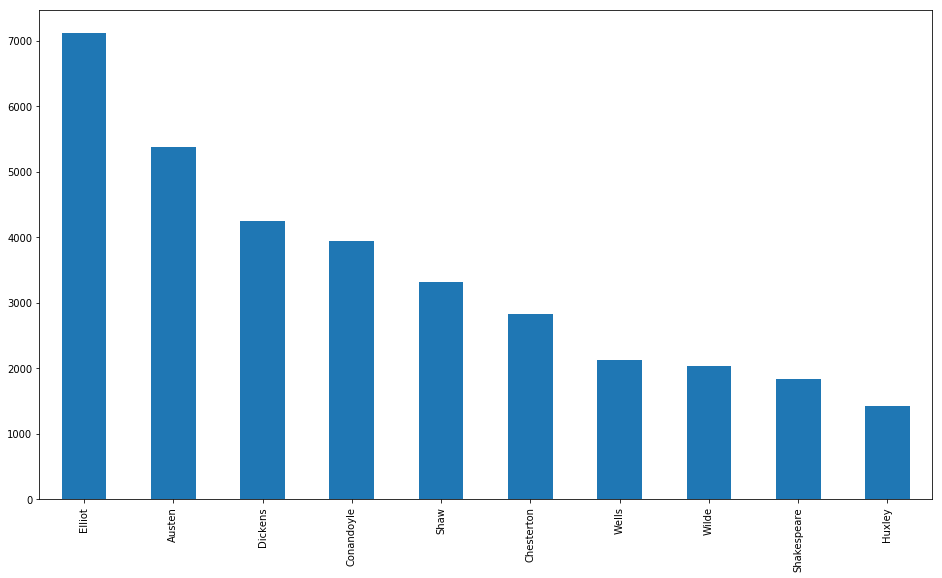

In [6]:
# Group into sentences.
austen_sents = [[str(sent), "Austen"] for sent in austen_doc.sents]
chesterton_sents = [[str(sent), "Chesterton"] for sent in chesterton_doc.sents]
conandoyle_sents = [[str(sent), "Conandoyle"] for sent in conandoyle_doc.sents]
dickens_sents = [[str(sent), "Dickens"] for sent in dickens_doc.sents]
elliot_sents = [[str(sent), "Elliot"] for sent in elliot_doc.sents]
huxley_sents = [[str(sent), "Huxley"] for sent in huxley_doc.sents]
shakespeare_sents = [[str(sent), 'Shakespeare'] for sent in shakespeare_doc.sents]
shaw_sents = [[str(sent), "Shaw"] for sent in shaw_doc.sents]
wells_sents = [[str(sent), "Wells"] for sent in wells_doc.sents]
wilde_sents = [[str(sent), "Wilde"] for sent in wilde_doc.sents]

#Combine the sentences from the two novels into one data frame.
names = ['Sentences','Author']
sentences = pd.DataFrame(austen_sents + chesterton_sents + conandoyle_sents +
                         dickens_sents + elliot_sents + huxley_sents + 
                         shakespeare_sents + shaw_sents + wells_sents +
                         wilde_sents, columns = names)

#Aadd numerical column to tag the authors for supervised classification
sentences.loc[sentences['Author'] == 'Austen', 'Target'] = 0
sentences.loc[sentences['Author'] == 'Chesterton', 'Target'] = 1
sentences.loc[sentences['Author'] == 'Conandoyle', 'Target'] = 2
sentences.loc[sentences['Author'] == 'Dickens', 'Target'] = 3
sentences.loc[sentences['Author'] == 'Elliot', 'Target'] = 4
sentences.loc[sentences['Author'] == 'Huxley', 'Target'] = 5
sentences.loc[sentences['Author'] == 'Shakespeare', 'Target'] = 6
sentences.loc[sentences['Author'] == 'Shaw', 'Target'] = 7
sentences.loc[sentences['Author'] == 'Wells', 'Target'] = 8
sentences.loc[sentences['Author'] == 'Wilde', 'Target'] = 9

#Add length of sentences to the Dataframe
sentences['len'] = sentences['Sentences'].map(len)

#Remove duplicate description columns to avoid having the initial and final information about Gutenberg project
sentences = sentences.drop_duplicates('Sentences')

#Remove rows that are empty during the cleaning process
sentences = sentences[~sentences['Sentences'].isnull()]

#remove sentences with length smaller than 50 characters to reduce the noise in the data
sentences = sentences[sentences.len > 50]
sentences.reset_index(inplace=True)
sentences.drop('index', inplace=True, axis=1)

#Plot the contribution of each author to the corpus (sentences)
sentences.Author.value_counts().plot(kind='bar', grid=False, figsize=(16, 9))

Data is split in a training and testing set with 25% for testing

In [7]:
#Split data in a train and test set
X_tr, X_te, y_tr, y_te = train_test_split(sentences['Sentences'], sentences['Target'],test_size=0.25, random_state=42)

Words are tokenized and an integer is assigned to them. Once they are converted into integers each book is represented by a matrix and the labels are represented by 10 binary columns

In [77]:
# integer encode sequences of words
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(X_tr)
x_train = tokenizer.texts_to_matrix(X_tr, mode = "tfidf")
x_test = tokenizer.texts_to_matrix(X_te, mode = "tfidf")

In [80]:
# Convert class vectors to binary class matrices
# So instead of one column with 10 values, create 10 binary columns
y_train = keras.utils.to_categorical(y_tr, 10)
y_test = keras.utils.to_categorical(y_te, 10)

### 3. Multi Layer Perceptron ###

The model is set up and the parameters are tunned so that the model gives the highest accuracy considering the small dataset that we have for this exercise. In this case, and after several trials, the number of words is set up to 25000 being the optimum.

In [84]:
#Start the model
model = Sequential()

#Set up the outter layer and reduce the number of words in voc to the optimum 25000
model.add(Dense(32, activation='relu', input_shape=(25000,)))

# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(10, activation='softmax'))

#Show the model features
model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 32)                800032    
_________________________________________________________________
dropout_49 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_50 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                330       
Total params: 801,418
Trainable params: 801,418
Non-trainable params: 0
_________________________________________________________________


The model is evaluated on the train and test set achieving an overall accuracy of 86%. in this case, a two layers of 32 neurons each is considered with dropout to reduce overfitting and softmax is used as the optimizer.

In [85]:
#Run the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))

#Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)

#Print results
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 25671 samples, validate on 8557 samples
Epoch 1/5
25671/25671 [==============================] - 13s 499us/step - loss: 1.0288 - acc: 0.7111 - val_loss: 0.4965 - val_acc: 0.8620
Epoch 2/5
25671/25671 [==============================] - 9s 342us/step - loss: 0.3385 - acc: 0.9017 - val_loss: 0.4159 - val_acc: 0.8702
Epoch 3/5
25671/25671 [==============================] - 8s 321us/step - loss: 0.1845 - acc: 0.9459 - val_loss: 0.4299 - val_acc: 0.8718
Epoch 4/5
25671/25671 [==============================] - 8s 324us/step - loss: 0.1177 - acc: 0.9652 - val_loss: 0.4748 - val_acc: 0.8704
Epoch 5/5
25671/25671 [==============================] - 8s 316us/step - loss: 0.0742 - acc: 0.9795 - val_loss: 0.5311 - val_acc: 0.8677
Test loss: 0.531117866101
Test accuracy: 0.867710646268


***Set up the parameters for the LTSM models***

To run the LTSM and be able to do the dimensionality reduction the number of top words is defined setting the rest  to zero, the max review legnth truncating the senteces of each author and the embedding vector. After several trials the optimum parameters are the ones shown bellow.

In [94]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000

# truncate and pad input sequences
max_review_length = 500
X_train_CNN = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test_CNN = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Vector length
embedding_vector_length = 32

#Print the shape of the train and test set
print('x_train shape:', X_train_CNN.shape)
print(X_train_CNN.shape[0], 'train samples')
print(X_test_CNN.shape[0], 'test samples')

x_train shape: (25671, 500)
25671 train samples
8557 test samples


### 4. Simple LTSM ###

To baseline the results obtained using LTSM, a simple LTSM is run setting the number of features to 100 and having the ouput layer with 10 outputs as the number of authors used in the classification problem

In [113]:
#Start the model with no dropouts to fight overfitting
model_LTSM = Sequential()
model_LTSM.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_LTSM.add(LSTM(100))
model_LTSM.add(Dense(10, activation='sigmoid'))

#Show model features
model_LTSM.summary()

#Compile the model
model_LTSM.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_77 (Dense)             (None, 10)                1010      
Total params: 214,210
Trainable params: 214,210
Non-trainable params: 0
_________________________________________________________________


Once the model is evaluated, an accuracy of 90% is achieved in three epochs. This overall accuracy seems to be the maximum accuracy that can be obtained with the dataset available.

In [114]:
#Fit the model
model_LTSM.fit(X_train_CNN, y_train,
          batch_size=64,
          epochs=3,
          verbose=1,
          validation_data=(X_test_CNN, y_test))

#Evaluate the model
score = model_LTSM_wdrop.evaluate(X_test_CNN, y_test, verbose=0)

#Print scores
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 25671 samples, validate on 8557 samples
Epoch 1/3
25671/25671 [==============================] - 228s 9ms/step - loss: 0.6010 - acc: 0.8936 - val_loss: 0.4956 - val_acc: 0.9000
Epoch 2/3
25671/25671 [==============================] - 224s 9ms/step - loss: 0.3953 - acc: 0.9000 - val_loss: 0.3372 - val_acc: 0.9000
Epoch 3/3
25671/25671 [==============================] - 226s 9ms/step - loss: 0.3234 - acc: 0.9000 - val_loss: 0.3166 - val_acc: 0.9000
Test loss: 0.313094868262
Test accuracy: 0.899999976158


### 5. LTSM with Dropout ###

To the previous model, dropout is included to reduce overfitting. In this case, two forward dropouts are included with 0.2 dropout rate and a layer of 100 and 10 neurons

In [108]:
#Set up the model including dropouts to fight overfitting
model_LTSM_wdrop = Sequential()
model_LTSM_wdrop.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_LTSM_wdrop.add(Dropout(0.2))
model_LTSM_wdrop.add(LSTM(100))
model_LTSM_wdrop.add(Dropout(0.2))
model_LTSM_wdrop.add(Dense(10, activation='sigmoid'))

#Model Features
model_LTSM_wdrop.summary()

#Compile the model
model_LTSM_wdrop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
dropout_57 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dropout_58 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 10)                1010      
Total params: 214,210
Trainable params: 214,210
Non-trainable params: 0
_________________________________________________________________


The maximum accuracy achieved continues to be 0.9 which is reasonable for the size of the dataset used.

In [109]:
#Fit the model
model_LTSM_wdrop.fit(X_train_CNN, y_train,
          batch_size=64,
          epochs=3,
          verbose=1,
          validation_data=(X_test_CNN, y_test))

#Evaluate the model
score = model_LTSM_wdrop.evaluate(X_test_CNN, y_test, verbose=0)

#Print the scores
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 25671 samples, validate on 8557 samples
Epoch 1/3
25671/25671 [==============================] - 222s 9ms/step - loss: 0.3289 - acc: 0.8980 - val_loss: 0.3129 - val_acc: 0.9000
Epoch 2/3
25671/25671 [==============================] - 218s 8ms/step - loss: 0.3148 - acc: 0.9000 - val_loss: 0.3124 - val_acc: 0.9000
Epoch 3/3
25671/25671 [==============================] - 219s 9ms/step - loss: 0.3139 - acc: 0.9000 - val_loss: 0.3131 - val_acc: 0.9000
Test loss: 0.313094868262
Test accuracy: 0.899999976158


### 6. LTSM & Convolutional Neural Network ###

A convolutional neural network with LTSM is run and in this case thwew are three layers used. The layers have 32, 128 and 10 each maintaining the LTSM model with 100 parameters. The convolutional link in one dimension linking 32 neurons and using a kernel size 3 is used.

In [104]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(32, 3, padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(128, activation='relu'))
model.add(LSTM(100))
model.add(Dense(10, activation='sigmoid'))

#Model features
model.summary()

# Compile the model to put it all together.
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
dense_72 (Dense)             (None, 250, 128)          4224      
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_73 (Dense)             (None, 10)                1010      
Total params: 259,938
Trainable params: 259,938
Non-trainable params: 0
_________________________________________________________________


The model achieves thebest result possible 90%. Although low for a neural network is reasonable neough for the size of the dataset.

In [112]:
#Fit the model
model.fit(X_train_CNN, y_train,
          batch_size=64,
          epochs=3,
          verbose=1,
          validation_data=(X_test_CNN, y_test))

#Evaluate the model
score = model.evaluate(X_test_CNN, y_test, verbose=0)

#Print the score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 25671 samples, validate on 8557 samples
Epoch 1/3
25671/25671 [==============================] - 226s 9ms/step - loss: 0.3277 - acc: 0.8978 - val_loss: 0.3128 - val_acc: 0.9000
Epoch 2/3
25671/25671 [==============================] - 225s 9ms/step - loss: 0.3149 - acc: 0.9000 - val_loss: 0.3127 - val_acc: 0.9000
Epoch 3/3
25671/25671 [==============================] - 223s 9ms/step - loss: 0.3142 - acc: 0.9000 - val_loss: 0.3126 - val_acc: 0.9000
Test loss: 0.31263894511
Test accuracy: 0.899999976158


### 7. LTSM & Recurrent Neural Network ###

In this case the LTSM model is run with a recurrent neural network. This network has a recurrent dropout of 0.2 and three layers maintaining LTSM to 100 features

In [115]:
# Building the Model
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='sigmoid'))

#Model features
model.summary()

# Compile the model to put it all together.
model.compile(loss='binary_crossentropy', optimizer='sgd',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                1010      
Total params: 214,210
Trainable params: 214,210
Non-trainable params: 0
_________________________________________________________________


The model is fit and the maximum result is achieved.

In [117]:
#Fit the model
model.fit(X_train_CNN, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(X_test_CNN, y_test))

#Evaluate the model
score = model.evaluate(X_test_CNN, y_test, verbose=0)

#Print the score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 25671 samples, validate on 8557 samples
Epoch 1/3
25671/25671 [==============================] - 170s 7ms/step - loss: 0.6543 - acc: 0.8582 - val_loss: 0.6123 - val_acc: 0.9000
Epoch 2/3
25671/25671 [==============================] - 170s 7ms/step - loss: 0.5663 - acc: 0.9000 - val_loss: 0.5139 - val_acc: 0.9000
Epoch 3/3
25671/25671 [==============================] - 170s 7ms/step - loss: 0.4549 - acc: 0.9000 - val_loss: 0.3976 - val_acc: 0.9000
Test loss: 0.397608311492
Test accuracy: 0.899999976158


### 8. Conclusion ###

Five different implementations of a neural network have been set up, tuned and run. When using LSTM and due to the size of the dataset the model achieves the highest result possible of 90% accuracy. Different parameters have been tunned in a trial and error way, from the to words to the size of the vectors until the maximum overall accuracy has been reached. In this case although the use of more comple models increases computing time, it does not increase the overall accuracy. Dropouts in the models help to reduce overfitting but due to the size of the dataset for these implementations the results are neglible.